## SELECTION DES ATTRIBUTS

#### EXO1

#### EXO2

In [1023]:
import pandas as pd

In [1024]:
import numpy as np

url = "./airquality.csv"
data = pd.read_csv(url, sep=',')

data = data[~np.isnan(data).any(axis=1)]

print(data.columns)

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')


In [1025]:
data.shape

(111, 7)

In [1026]:
data.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [1027]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7


In [1028]:
data = data.drop(data.columns[0], axis=1) 

Correlation matrix

In [1029]:
df = pd.DataFrame(data)

correlation = df.corr()
print(correlation)

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.612497  0.698541  0.142885 -0.005190
Solar.R  0.348342  1.000000 -0.127183  0.294088 -0.074067 -0.057754
Wind    -0.612497 -0.127183  1.000000 -0.497190 -0.194496  0.049871
Temp     0.698541  0.294088 -0.497190  1.000000  0.403972 -0.096546
Month    0.142885 -0.074067 -0.194496  0.403972  1.000000 -0.009001
Day     -0.005190 -0.057754  0.049871 -0.096546 -0.009001  1.000000


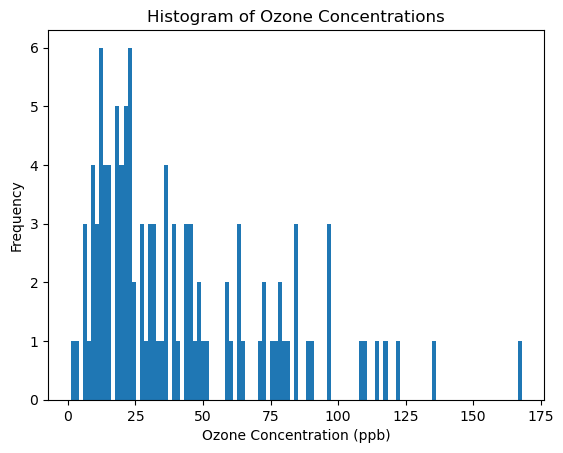

In [1030]:
import matplotlib.pyplot as plt


plt.hist(data["Ozone"], bins=data.shape[0])

plt.xlabel("Ozone Concentration (ppb)")
plt.ylabel("Frequency")
plt.title("Histogram of Ozone Concentrations")

plt.show()

### preparation des training_data et test_data 

# Linear regression

In [1032]:
data.shape

(111, 6)

In [1033]:
x = df.drop('Ozone', axis=1)
y = data['Ozone']
print(x.shape)
print(y.shape)

(111, 5)
(111,)


In [1034]:
ones_column = np.ones((x.shape[0], 1))
x = np.hstack((ones_column, x))
x.shape

(111, 6)

In [1035]:
print(x)

[[  1.  190.    7.4  67.    5.    1. ]
 [  1.  118.    8.   72.    5.    2. ]
 [  1.  149.   12.6  74.    5.    3. ]
 [  1.  313.   11.5  62.    5.    4. ]
 [  1.  299.    8.6  65.    5.    7. ]
 [  1.   99.   13.8  59.    5.    8. ]
 [  1.   19.   20.1  61.    5.    9. ]
 [  1.  256.    9.7  69.    5.   12. ]
 [  1.  290.    9.2  66.    5.   13. ]
 [  1.  274.   10.9  68.    5.   14. ]
 [  1.   65.   13.2  58.    5.   15. ]
 [  1.  334.   11.5  64.    5.   16. ]
 [  1.  307.   12.   66.    5.   17. ]
 [  1.   78.   18.4  57.    5.   18. ]
 [  1.  322.   11.5  68.    5.   19. ]
 [  1.   44.    9.7  62.    5.   20. ]
 [  1.    8.    9.7  59.    5.   21. ]
 [  1.  320.   16.6  73.    5.   22. ]
 [  1.   25.    9.7  61.    5.   23. ]
 [  1.   92.   12.   61.    5.   24. ]
 [  1.   13.   12.   67.    5.   28. ]
 [  1.  252.   14.9  81.    5.   29. ]
 [  1.  223.    5.7  79.    5.   30. ]
 [  1.  279.    7.4  76.    5.   31. ]
 [  1.  127.    9.7  82.    6.    7. ]
 [  1.  291.   13.8  90. 

In [1036]:
x.shape[1] # shape[1] nombre de columns (features)

6

In [1037]:
import numpy as np

y_array = y.to_numpy()
y= y_array.reshape(y.shape[0], 1)
print(y.shape)

(111, 1)


In [1038]:
np.random.seed(0)  
theta = np.random.randn(x.shape[1], 1)
theta

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788]])

In [1039]:
theta.shape

(6, 1)

In [1040]:
def Linear_model(x, theta):
    return x.dot(theta)

In [1041]:
Linear_model(x, theta).shape

(111, 1)

In [1042]:
x.shape

(111, 6)

In [1043]:
y.shape

(111, 1)

In [1044]:
def cost_function(x, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((Linear_model(x, theta) - y)**2)

In [1045]:
x.shape

(111, 6)

In [1046]:
y.shape

(111, 1)

In [1047]:
theta.shape

(6, 1)

In [1048]:
cost_function(x, y, theta)

24080.433347838145

In [1049]:
def grad(x, y, theta , alpha):
    m = len(y)
    return 1/m * alpha * x.T.dot(Linear_model(x, theta) - y)

In [1050]:
x.T.shape

(6, 111)

In [1051]:
(Linear_model(x, theta) - y).shape

(111, 1)

In [1052]:
x.T.dot(Linear_model(x, theta) - y).shape

(6, 1)

In [1053]:
def gradient_descent(x, y, theta, alpha, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)
    
    for i in range(n_iterations):

        theta = theta - learning_rate * grad(x, y, theta, alpha)
        
        cost_history[i] = cost_function(x, y, theta)
        
    return theta, cost_history

In [1054]:
n_iterations = 100
learning_rate = 0.0000001
alpha = 1

theta_final, cost_history = gradient_descent(x, y, theta, alpha, learning_rate, n_iterations)

In [1055]:
theta_final

array([[ 1.76229187],
       [ 0.06189583],
       [ 0.960885  ],
       [ 2.10360887],
       [ 1.85479177],
       [-1.00436129]])

In [1056]:
cost_history

array([23868.91139449, 23659.40761107, 23451.90271577, 23246.37761104,
       23042.81338179, 22841.19129364, 22641.49279121, 22443.6994964 ,
       22247.79320672, 22053.75589357, 21861.56970062, 21671.21694213,
       21482.68010135, 21295.94182889, 21110.98494111, 20927.79241857,
       20746.34740441, 20566.63320287, 20388.63327765, 20212.33125051,
       20037.71089963, 19864.75615823, 19693.45111301, 19523.78000272,
       19355.7272167 , 19189.27729343, 19024.41491913, 18861.12492633,
       18699.39229247, 18539.20213851, 18380.5397276 , 18223.39046367,
       18067.73989011, 17913.57368843, 17760.87767696, 17609.63780951,
       17459.8401741 , 17311.47099166, 17164.51661479, 17018.96352647,
       16874.79833883, 16732.0077919 , 16590.57875243, 16450.49821261,
       16311.75328895, 16174.33122102, 16038.21937034, 15903.40521916,
       15769.87636935, 15637.6205412 , 15506.62557236, 15376.87941667,
       15248.37014306, 15121.08593447, 14995.01508673, 14870.14600749,
      

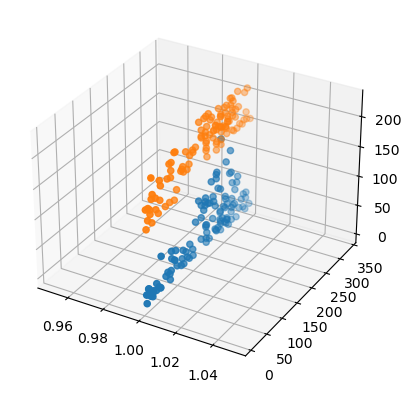

In [1057]:
predictions = Linear_model(x, theta_final)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

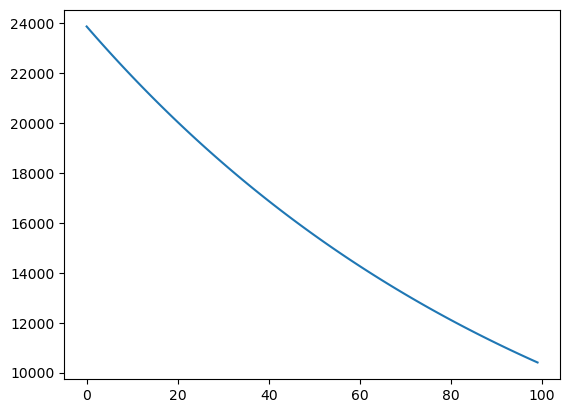

In [1058]:
plt.plot(range(n_iterations), cost_history)

In [1059]:
def coef_determination(y, pred):

    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [1060]:
coef_determination(y, predictions)

-17.969803758535342